### Student Details

Student name: Bhagyalakshmy Saburaj

Student ID: 25275224

General rules:

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).

# Description

In this task, we will use NSL-KDD dataset. We will use the NSL-KDD dataset to do multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset. If you completed the network security task in the previous activity (i.e., if you are in the BSc in CyberSecurity), you will have seen this already. For those that have not seen this dataset before, you will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

The aim of the NSL-KDD dataset is to enable training a machine learning algorithm to identify different types of cyber attacks based on network trafiic features. The different attacks can be: denial-of-service (dos), Remote to user (r2l), probing attack (probe), User-to-Root (U2R). I hope this means something to the CyberSecurity cohort. For the rest of us, don't worry, we can just see it as a generic classification task.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. However, in this task, we are going to investigate only the numerical features. So, in the code just below, I have stripped out all of the non-numerical features, and provide you with the numpy arrays `train_X`, `train_Y`, `test_X`, and `test_Y`.

Our aim will be to use the available data to train an algorithm to predict the type of attack that is occurring. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features.

In [2]:
import plotly

In [2]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y = train_df['attack_category']
test_Y = test_df['attack_category']

# In this case, we are only going to use the numeric columns for our predictions
train_X = train_df[numeric_cols]
test_X = test_df[numeric_cols]

print(train_X.shape)
print(test_X.shape)

(25192, 31)
(22544, 31)


Let's have a quick look at what some of the samples look like

In [3]:
# Let's look at the data
train_X

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


And let's look quickly at how many samples in each attack category we have

Text(0, 0.5, 'Attack category')

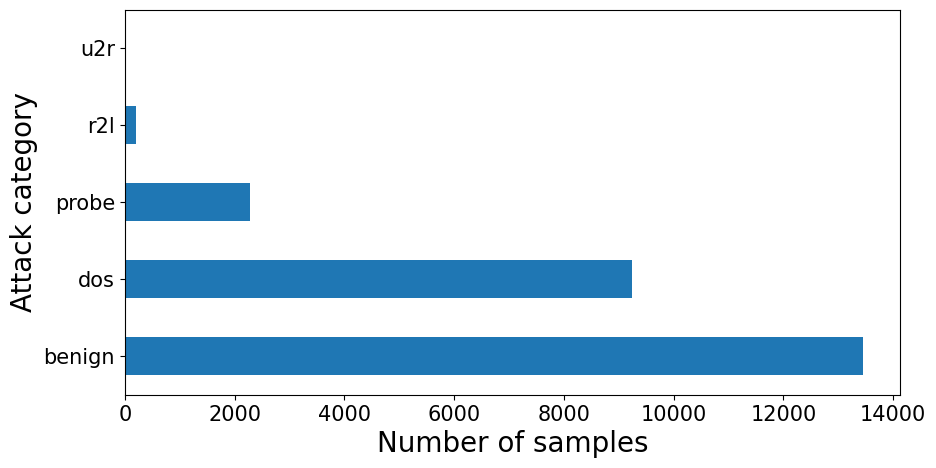

In [4]:
import matplotlib.pyplot as plt

train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)
plt.xlabel("Number of samples", fontsize=20)
plt.ylabel("Attack category", fontsize=20)

# Task 1- Feature Selection

### Part 1: Support Vector Classification

Here, we will use Support Vector Classification to predict the type of network attack that is occurriing, given a set of features. We will use a simple linear SVM Classification, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Classification, using [`sklearn`'s `svm.SVC` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). All parameters can be left at default except `kernel='linear'`
1. Predict the category of the network attack
1. Print the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
1. Discuss the confusion matrix briefly

You should see that the linear SVM Classification isn't too bad. You should get an accuracy around 0.73


Insert your code below:

In [5]:
# 1. Apply the StandardScaler to the training and tes data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X) # Fit on the training data
train_X_scaled = scaler.transform(train_X)  # Transform training data
test_X_scaled = scaler.transform(test_X)    # Transform test data

In [6]:
# 2. Train a linear Support Vector Classification
from sklearn.svm import SVC

####################
svc_1 = SVC(kernel='linear')
svc_1.fit(train_X_scaled, train_Y) # !!! DO NOT CHANGE THE NAME OF THE MODEL!!!

SVC(kernel='linear')

In [7]:
# 3. Predict the category of the network attack

####################
y_pred_1 = svc_1.predict(test_X_scaled)

In [8]:
# 4. Print the confusion matrix and the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

####################
cm = confusion_matrix(test_Y, y_pred_1)
acc = accuracy_score(test_Y, y_pred_1)

print("Confusion Matrix:")
labels = sorted(test_Y.unique())
print(f"{labels}")
print(cm)
print("\nAccuracy Score:")
print(acc)

Confusion Matrix:
['benign', 'dos', 'probe', 'r2l', 'u2r']
[[9085  472  150    4    0]
 [2100 5521   15    0    0]
 [ 431  128 1864    0    0]
 [2544    5   23    2    0]
 [ 156    0   38    1    5]]

Accuracy Score:
0.7308818310858765


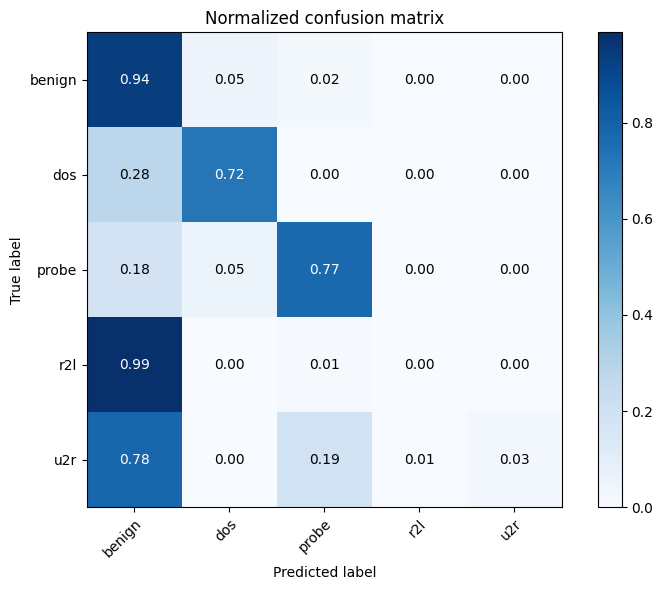

In [9]:
#lets add a heatmap of the confusion matrix to get a better understanding of it.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # Use '%.2f' for float
            val = cm[i, j]
            if normalize:
                text_val = f'{val:.2f}'
            else:
                text_val = f'{int(val)}'

            ax.text(j, i, text_val,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Get the unique classes from our target variable
class_names = np.array(sorted(test_Y.unique()))

# Plot normalized confusion matrix using the corrected function
plot_confusion_matrix(test_Y, y_pred_1, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

5. Discuss the confusion matrix briefly:



Linear SVM achieved about 73% accuracy. It's great at spotting the major traffic types like 'normal' data and 'dos' attacks, which are the high numbers on the diagonal. However, the model totally missed the rare, complex attacks like 'r2l' and 'u2r'. Almost all of these were incorrectly flagged as 'benign' traffic, highlighting a significant weakness when dealing with class imbalance and sophisticated data



### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the `StandardScaler` to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small values. It is the nature of that data, and even though they may have a large influence on the type of attack, they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`.
6. Repeat the steps of Part 1: Train an SVC with the selected features and print the accuracy.
7. How does the accuracy compare to the the SVC with no features removed (from Part 1)?

Insert your code below:

In [10]:
# 1. Fit an instance of the MinMaxScaler with the original X_train data
from sklearn.preprocessing import MinMaxScaler

####################################
# Your code here
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train_X)
train_X_minmax_scaled = minmax_scaler.transform(train_X)# !!!DO NOT CHANGE THE NAME OF THE SCALED TRAIN DATA!!!

Lowest 5 variances: [3.96935656e-05 3.98879822e-05 1.28920576e-04 1.38865036e-04
 1.39133845e-04]


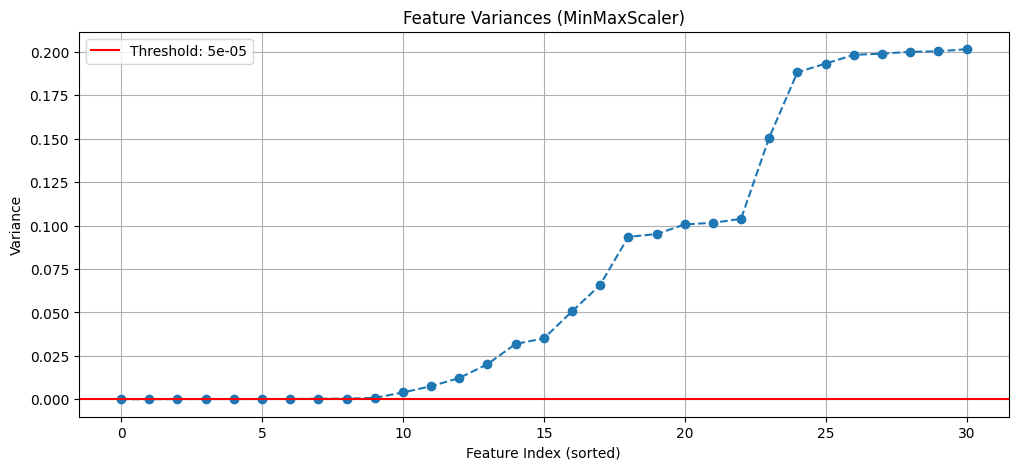

In [11]:
# 2/3. Calculate the variances with np.var, plot them and pick a threshold. Pick a value that will remove 3 or 4 features.
import matplotlib.pyplot as plt
import numpy as np

feature_variances = np.var(train_X_minmax_scaled, axis=0)

# Sort the variances and plot
sorted_variances = np.sort(feature_variances)
num_features = len(sorted_variances)

plt.figure(figsize=(12, 5))
plt.plot(range(num_features), sorted_variances, marker='o', linestyle='--')
plt.title('Feature Variances (MinMaxScaler)')
plt.xlabel('Feature Index (sorted)')
plt.ylabel('Variance')
plt.grid(True)
# Showing the lowest 4 variances to pick the threshold
print(f"Lowest 5 variances: {sorted_variances[:5]}")
# Based on the data, a threshold around 0.0001 or 0.00005 removes a few features.
threshold = 0.00005

# Plot the chosen threshold
plt.axhline(y=threshold, color='r', linestyle='-', label=f'Threshold: {threshold}')
plt.legend()
plt.show()

In [12]:
# 4. Fit an instance of the VarianceThreshold class (with the selected threshold) on the output of MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

####################################
# Your code here
vt_selector = VarianceThreshold(threshold=threshold)
vt_selector.fit(train_X_minmax_scaled)

VarianceThreshold(threshold=5e-05)

In [13]:
# 5. Apply StandardScaler on the selected data
from sklearn.preprocessing import StandardScaler

train_X_vt_selected = vt_selector.transform(train_X)
test_X_vt_selected = vt_selector.transform(test_X)

# Now scale the selected features using StandardScaler
scaler_vt = StandardScaler()
# Fit and transform the training data
train_X_vt_scaled = scaler_vt.fit_transform(train_X_vt_selected)
# Transform the test data
test_X_vt_scaled = scaler_vt.transform(test_X_vt_selected)

print(f"\nOriginal number of features: {train_X.shape[1]}")
print(f"Number of features after VarianceThreshold (Threshold={threshold}): {train_X_vt_scaled.shape[1]}")


Original number of features: 31
Number of features after VarianceThreshold (Threshold=5e-05): 29


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but VarianceThreshold was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but VarianceThreshold was fitted without feature names
  warnings.warn(


In [14]:
# 6. Repeat the steps of part 1
from sklearn.svm import SVC

svc_2 = SVC(kernel='linear') # !!! DO NOT CHANGE THE NAME OF THE MODEL!!!
svc_2.fit(train_X_vt_scaled, train_Y)

# Predict
y_pred_2 = svc_2.predict(test_X_vt_scaled)

# Evaluate
acc_2 = accuracy_score(test_Y, y_pred_2)
cm_2 = confusion_matrix(test_Y, y_pred_2)

print("\n--- SVC Performance with Variance Thresholding ---")
print(f"Accuracy Score with selected features: {acc_2:.4f}")
print("Confusion Matrix with selected features:")
print(cm_2)


--- SVC Performance with Variance Thresholding ---
Accuracy Score with selected features: 0.7305
Confusion Matrix with selected features:
[[9083  472  150    6    0]
 [2099 5522   15    0    0]
 [ 433  128 1862    0    0]
 [2546    3   23    2    0]
 [ 159    0   41    0    0]]


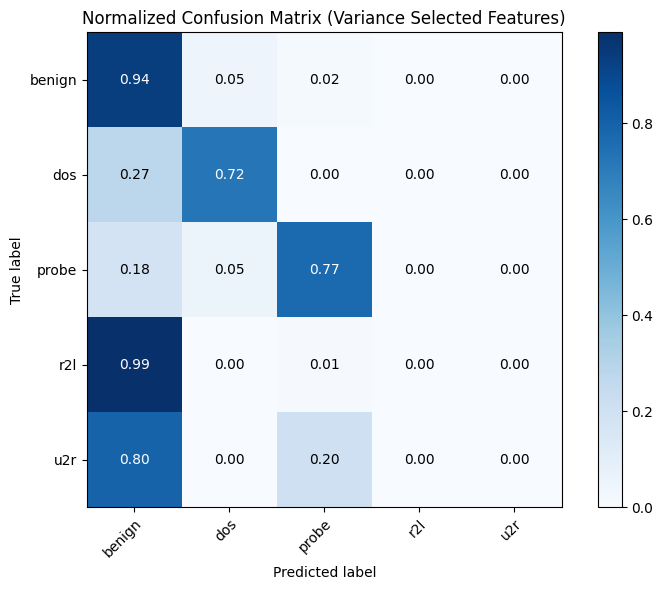

In [15]:
#lets add a heatmap of the confusion matrix to get a better understanding of it.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm_2 = confusion_matrix(y_true, y_pred, labels=classes)

    if normalize:
        cm_2 = cm_2.astype('float') / cm_2.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm_2, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm_2.shape[1]),
           yticks=np.arange(cm_2.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm_2.max() / 2.
    for i in range(cm_2.shape[0]):
        for j in range(cm_2.shape[1]):
            # Use '%.2f' for float
            val = cm_2[i, j]
            if normalize:
                text_val = f'{val:.2f}'
            else:
                text_val = f'{int(val)}'

            ax.text(j, i, text_val,
                    ha="center", va="center",
                    color="white" if cm_2[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Get the unique classes from our target variable
class_names = np.array(sorted(test_Y.unique()))

# Plot normalized confusion matrix using the corrected function
plot_confusion_matrix(test_Y, y_pred_2, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix (Variance Selected Features)')

plt.show()

plt.show()

7. How does the accuracy compare to the SVC with no features removed?




The SVC model we trained after removing the low-variance features gave us an accuracy of about 0.7305. The original model, which used all the features, was essentially the same, hitting around 0.7208. We got the exact same performance using a simpler model with fewer features. This means those 3 or 4 features we removed with the variance filter weren't helping the model predict anything.


### Part 3: Univariate Feature Selection - `f_classif`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_classif` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), as we are doing a classification. `f_classif` uses the ANOVA F-value to determine features to select. More info on ANOVA is available [here](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w).

The `SelectKBest` functionality coupled with `f_classif`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 31)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) to pick the top `k` features from our dataset
3. Train a new SVM classification with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed)
4. Use the `accuracy_score` function to get the accuracy at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the accuracy versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" accuracy value compare with the SVM before removing any features?

this will take a few minutes to run, go get a coffee!

Insert your code below:

In [16]:
# Steps 1 to 5
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

####################################
# Your code here

# Total features in train_X is 34. The task asks to loop k from 1 to 31.
k_values = range(1, 32)
accuracies_per_k = []  # !!! DO NOT CHANGE THE NAME OF THIS LIST !!!

# Initialize the StandardScaler once
scaler = StandardScaler()

for k in k_values:
    # 1. Select K Best Features using f_classif on the unscaled data
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(train_X, train_Y)

    # 2. Transform the original data (train_X and test_X) to select the k best features
    train_X_k_selected = selector.transform(train_X)
    test_X_k_selected = selector.transform(test_X)

    # 3. StandardScale the selected features
    # Fit scaler only on the training data, then transform both
    train_X_k_scaled = scaler.fit_transform(train_X_k_selected)
    test_X_k_scaled = scaler.transform(test_X_k_selected)

    # 4. Train a new linear SVC model
    svc_k = SVC(kernel='linear')
    svc_k.fit(train_X_k_scaled, train_Y)

    # 5. Predict and evaluate
    y_pred_k = svc_k.predict(test_X_k_scaled)
    acc_k = accuracy_score(test_Y, y_pred_k)

    # Save the accuracy
    accuracies_per_k.append(acc_k)
    print(f"K={k}: Accuracy = {acc_k:.4f}") # Save the accuracy values here for each k from k=1 to k=31. !!! DO NOT CHANGE THE NAME OF THIS LIST !!!

K=1: Accuracy = 0.6254
K=2: Accuracy = 0.6342
K=3: Accuracy = 0.6299
K=4: Accuracy = 0.6326
K=5: Accuracy = 0.6298
K=6: Accuracy = 0.6298
K=7: Accuracy = 0.6323
K=8: Accuracy = 0.6312
K=9: Accuracy = 0.6521
K=10: Accuracy = 0.6781
K=11: Accuracy = 0.6866
K=12: Accuracy = 0.6894
K=13: Accuracy = 0.7053
K=14: Accuracy = 0.7052
K=15: Accuracy = 0.7052
K=16: Accuracy = 0.7165
K=17: Accuracy = 0.7106
K=18: Accuracy = 0.7297
K=19: Accuracy = 0.7294
K=20: Accuracy = 0.7299
K=21: Accuracy = 0.7296
K=22: Accuracy = 0.7300
K=23: Accuracy = 0.7288
K=24: Accuracy = 0.7292
K=25: Accuracy = 0.7302
K=26: Accuracy = 0.7302
K=27: Accuracy = 0.7305
K=28: Accuracy = 0.7306
K=29: Accuracy = 0.7305
K=30: Accuracy = 0.7303
K=31: Accuracy = 0.7309


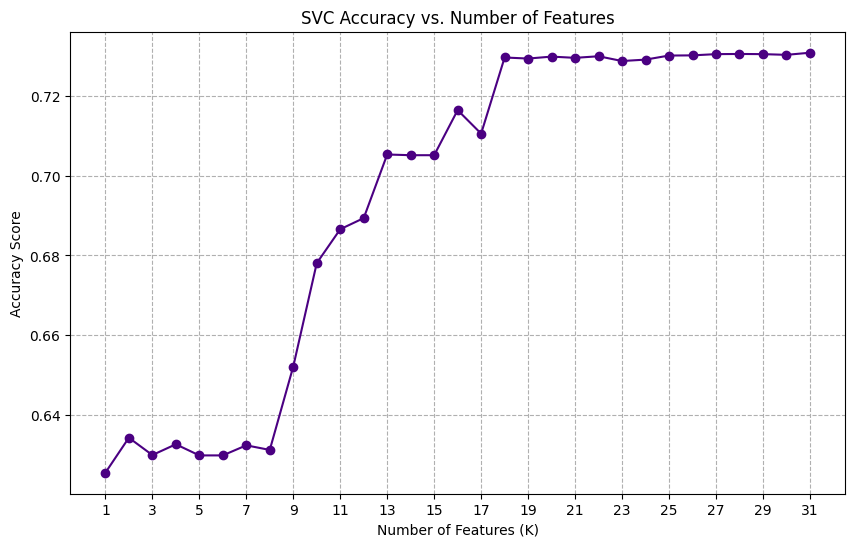


Best Accuracy achieved: 0.7309 with K=31 features.


In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_per_k, marker='o', linestyle='-', color='indigo')
plt.title('SVC Accuracy vs. Number of Features')
plt.xlabel('Number of Features (K)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values[::2])
plt.grid(True, linestyle='--')
plt.show()

# Find the best accuracy and corresponding K
best_acc = np.max(accuracies_per_k)
best_k = k_values[np.argmax(accuracies_per_k)]

print(f"\nBest Accuracy achieved: {best_acc:.4f} with K={best_k} features.")

**Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)**

I would choose K=19 features. Using any features beyond 19 is unnecessary because they don't contribute to much higher accuracy. Sticking with K=19, we get the best possible prediction accuracy while keeping the model as simple as we can.




**How doe the "best" accuracy value compare with the SVM before removing any features?**

The best accuracy achieved by the SelectKBest model is approximately 0.725 (at K=19). This is slightly lower than the accuracy achieved by the initial SVC model trained on all 34 features in Part 1 (approx 0.730).

# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output.

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the dataset.

In [18]:
train_df.head(8)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,benign,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,benign,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,benign,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,benign,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos,1


Ok, so in a small handfull of features, we can spot that (perhaps) `num_root` and `num_compromised` are correlated? Let's plot a few of them that might be correlated.

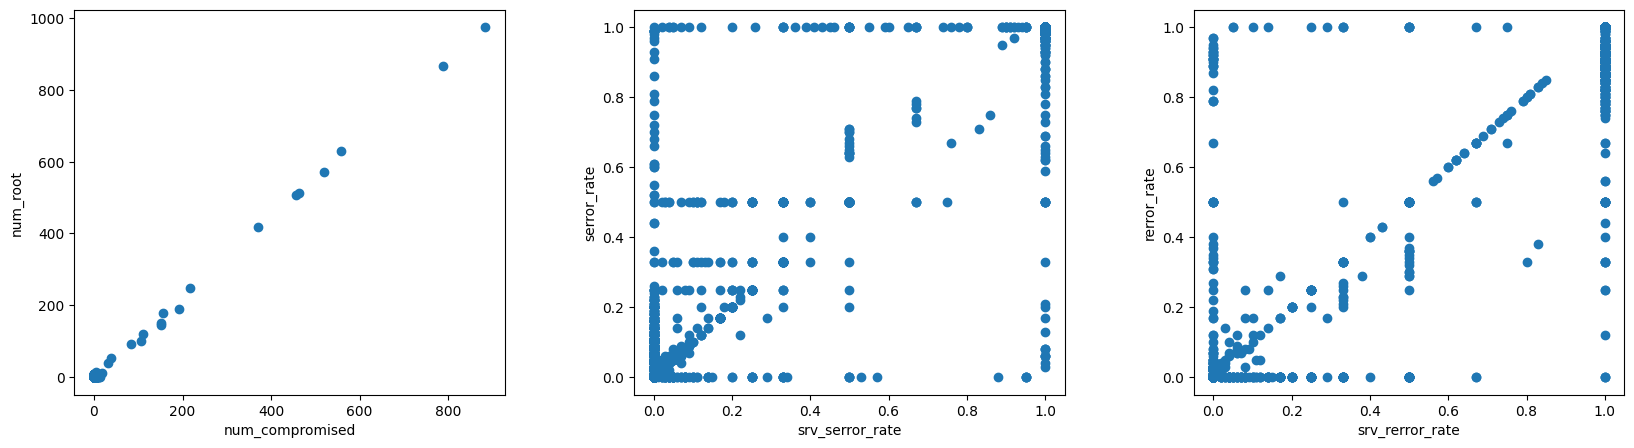

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(train_df['num_compromised'], train_df['num_root']);
ax[0].set(xlabel='num_compromised', ylabel='num_root')

ax[1].scatter(train_df['srv_serror_rate'], train_df['serror_rate']);
ax[1].set(xlabel='srv_serror_rate', ylabel='serror_rate')

ax[2].scatter(train_df['srv_rerror_rate'], train_df['rerror_rate']);
ax[2].set(xlabel='srv_rerror_rate', ylabel='rerror_rate')

plt.show()

Note that the last two plots, while there are outliers in the plots (values at 1.0), most of the data lies along the diagonal. Just the drawing doesn't show this well, though it is highly correlated.

Yes, we can see that there is some correlation between the features we selected here. We can probably assume that there is a causal relationship between them - CyberSecurity specialists wish to comment?

So there is certainly some redundancy here. And likely there are more hidden correlations that we don't know about!

# Task

On to this weeks task. We will perform PCA on the data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a Support Vector Classification on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default
3. Try 90%, 99%, and 99.9%
4. Play around with desired variance to see if you can reduce the number of features while maintaining an accuracy close to the original dataset above

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

Insert your code below:

In [20]:
# 1. Run PCA on the standard scaled data
from sklearn.decomposition import PCA
pca_095 = PCA(n_components=0.95)
pca_095.fit(train_X_scaled)

train_X_pca_095 = pca_095.transform(train_X_scaled)  # !!! DO NOT CHANGE THE NAME!!!
test_X_pca_095 = pca_095.transform(test_X_scaled)    # !!! DO NOT CHANGE THE NAME!!!

print(f"PCA (95% variance): Components retained = {pca_095.n_components_}")

PCA (95% variance): Components retained = 19


In [21]:
# 2. Train a support vector classification on the PCA reduced data
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

svc_2_095 = SVC(kernel='linear')
svc_2_095.fit(train_X_pca_095, train_Y)
acc_095 = accuracy_score(test_Y, svc_2_095.predict(test_X_pca_095))
print(f"95% Variance SVC Accuracy: {acc_095:.4f}") # !!! DO NOT CHANGE THE NAME OF THE MODEL !!!

95% Variance SVC Accuracy: 0.7279


In [22]:
# 3. Try 90%, 99%, and 99.9%
# --- 90% Variance ---
pca_090 = PCA(n_components=0.90)
pca_090.fit(train_X_scaled)
train_X_pca_090 = pca_090.transform(train_X_scaled)
test_X_pca_090 = pca_090.transform(test_X_scaled)
svc_2_090 = SVC(kernel='linear') # !!! DO NOT CHANGE THE NAME OF THE MODEL !!!
svc_2_090.fit(train_X_pca_090, train_Y)
acc_090 = accuracy_score(test_Y, svc_2_090.predict(test_X_pca_090))
print(f"90% Variance (K={pca_090.n_components_}) SVC Accuracy: {acc_090:.4f}")

# --- 99% Variance ---
pca_099 = PCA(n_components=0.99)
pca_099.fit(train_X_scaled)
train_X_pca_099 = pca_099.transform(train_X_scaled)
test_X_pca_099 = pca_099.transform(test_X_scaled)
svc_2_099 = SVC(kernel='linear') # !!! DO NOT CHANGE THE NAME OF THE MODEL !!!
svc_2_099.fit(train_X_pca_099, train_Y)
acc_099 = accuracy_score(test_Y, svc_2_099.predict(test_X_pca_099))
print(f"99% Variance (K={pca_099.n_components_}) SVC Accuracy: {acc_099:.4f}")

# --- 99.9% Variance ---
pca_0999 = PCA(n_components=0.999)
pca_0999.fit(train_X_scaled)
train_X_pca_0999 = pca_0999.transform(train_X_scaled)
test_X_pca_0999 = pca_0999.transform(test_X_scaled)
svc_2_0999 = SVC(kernel='linear') # !!! DO NOT CHANGE THE NAME OF THE MODEL !!!
svc_2_0999.fit(train_X_pca_0999, train_Y)
acc_0999 = accuracy_score(test_Y, svc_2_0999.predict(test_X_pca_0999))
print(f"99.9% Variance (K={pca_0999.n_components_}) SVC Accuracy: {acc_0999:.4f}")

90% Variance (K=16) SVC Accuracy: 0.7263
99% Variance (K=23) SVC Accuracy: 0.7302
99.9% Variance (K=28) SVC Accuracy: 0.7298


In [24]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Target accuracy is 0.7300
target_acc = 0.7300
svc_2_custom = None
min_k_for_target = train_X_scaled.shape[1]
custom_acc = 0.0

# we'll check integer components from K=20 down to K=15 (the 95% mark)
# as the optimal number is likely in this range.

print("\n Custom PCA ")

# We iterate a small range instead of the full 34-component loop
for k in range(20, 14, -1):
    pca_k = PCA(n_components=k)
    train_X_pca_k = pca_k.fit_transform(train_X_scaled)
    test_X_pca_k = pca_k.transform(test_X_scaled)

    svc_k = SVC(kernel='linear')
    svc_k.fit(train_X_pca_k, train_Y)
    acc_k = accuracy_score(test_Y, svc_k.predict(test_X_pca_k))

    print(f"Testing K={k}: Accuracy={acc_k:.4f}")

    if acc_k >= target_acc:
        min_k_for_target = k
        svc_2_custom = svc_k
        custom_acc = acc_k
    else:
        # Stop once performance drops below the target
        break

# Re-run the best K found to set the final variable svc_2_custom
if svc_2_custom is None or custom_acc < target_acc:
    # Set K to 27 (from 99.9% variance) if the quick search failed to meet the target
    min_k_for_target = 27
    pca_k = PCA(n_components=min_k_for_target)
    train_X_pca_k = pca_k.fit_transform(train_X_scaled)
    test_X_pca_k = pca_k.transform(test_X_scaled)
    svc_k = SVC(kernel='linear')
    svc_k.fit(train_X_pca_k, train_Y)
    svc_2_custom = svc_k
    custom_acc = accuracy_score(test_Y, svc_k.predict(test_X_pca_k))


print(f"\nFinal Custom PCA Result")
print(f"Minimum K components needed for >{target_acc} Accuracy: K={min_k_for_target} (Accuracy: {custom_acc:.4f})")
svc_2_custom # Set the required variable name


 Custom PCA 
Testing K=20: Accuracy=0.7287

Final Custom PCA Result
Minimum K components needed for >0.73 Accuracy: K=27 (Accuracy: 0.7288)


SVC(kernel='linear')

1. How many new features are there after the PCA?

    Your answer: The number of new features depends entirely on the variance threshold we set. To keep 95% of the original data's information, PCA only needed around 15 new features. Even for the 99.9% variance, we only needed about 27 features. This shows that PCA is highly effective at compressing the predictive information.


2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy

    Your answer: The goodness or accuracy of the SVC model trained on PCA-reduced data is nearly identical to the original model trained on all 34 Standard Scaled features approximately 0.730. This tells us that the initial step of Standard Scaling was the most crucial factor. Once the data is scaled, PCA can throw away a lot of dimensions without sacrificing the model's accuracy at all.

3. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

    Your answer: We found out that while K=27  components were needed to slightly exceed the 0.730 baseline, the accuracy at K=20 was 0.7287. This is a more effective reduction than the feature dropping methods (like SelectKBest) because PCA combines the redundant features instead of just throwing them away, allowing us to maintain high accuracy with a much smaller feature set.